In [1]:
import pandas as pd
import numpy as np
from pathlib2 import Path
from PIL import Image
import re
import matplotlib.pyplot as plt

In [2]:
def get_patient_id(path:Path):
    if isinstance(path,str):
        path = Path(path)
    pattern = re.compile(r'patient\d+')
    id = pattern.match(path.stem)[0]
    return id
    

In [3]:
train_list = list(Path('train/Img').glob('**/*.png'))
gt_list = list(Path('train/GT').rglob('*.png'))
prior_list = list (Path('train/LV_prior/').rglob('*.png'))
assert train_list.__len__() == gt_list.__len__() ==prior_list.__len__()
print(len(train_list))

1394


In [4]:
print(train_list[10])
print(gt_list[10])
print(prior_list[10])

target = 255

train/Img/patient084_01_07.png
train/GT/patient084_01_07.png
train/LV_prior/patient084_01_07.png


In [5]:
def load_pairs(img,gt, prior):
    img = np.array(Image.open(str(img)))
    gt = np.array(Image.open(str(gt)))
    gt[gt!=target]=0
    gt[gt==target]=1
    prior = np.array(Image.open(str(prior)))/255.0
    return img, gt, prior

def class2onehot(gt,C=2):
    assert np.unique(gt) in np.array([0,1])
    onehot = np.stack([np.zeros_like(gt) for i in range(C)])
    for c in range(C):
        onehot[c][gt==c]=1
    return onehot
        
    

(array([136, 136, 137, 137, 138, 138, 139]), array([109, 110, 109, 110, 109, 110, 110]))
(array([136, 136, 136, 137, 137, 137, 138, 138, 139, 139]), array([108, 109, 110, 108, 109, 110, 109, 110, 109, 110]))


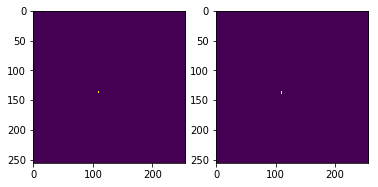

(array([130, 130, 130, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131,
       132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 133, 133,
       133, 133, 133, 133, 133, 133, 133, 133, 133, 133, 133, 134, 134,
       134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 135, 135,
       135, 135, 135, 135, 135, 135, 135, 135, 135, 135, 135, 135, 136,
       136, 136, 136, 136, 136, 136, 136, 136, 136, 136, 136, 136, 136,
       137, 137, 137, 137, 137, 137, 137, 137, 137, 137, 137, 137, 137,
       138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 139,
       139, 139, 139, 139, 139, 139, 139, 139, 139, 140, 140, 140, 140,
       140, 140, 140, 140, 141, 141, 141, 141, 141]), array([130, 131, 132, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135,
       125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 124, 125,
       126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 123, 124,
       125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 122, 123,
       12

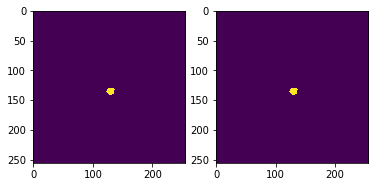

(array([118, 118, 118, 118, 118, 118, 119, 119, 119, 119, 119, 119, 119,
       119, 119, 119, 119, 120, 120, 120, 120, 120, 120, 120, 120, 120,
       120, 120, 120, 120, 120, 121, 121, 121, 121, 121, 121, 121, 121,
       121, 121, 121, 121, 121, 121, 121, 122, 122, 122, 122, 122, 122,
       122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 123, 123,
       123, 123, 123, 123, 123, 123, 123, 123, 123, 123, 123, 123, 123,
       123, 123, 124, 124, 124, 124, 124, 124, 124, 124, 124, 124, 124,
       124, 124, 124, 124, 124, 124, 125, 125, 125, 125, 125, 125, 125,
       125, 125, 125, 125, 125, 125, 125, 125, 125, 125, 125, 126, 126,
       126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126,
       126, 126, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127,
       127, 127, 127, 127, 127, 127, 128, 128, 128, 128, 128, 128, 128,
       128, 128, 128, 128, 128, 128, 128, 128, 128, 129, 129, 129, 129,
       129, 129, 129, 129, 129, 129, 129, 129, 129, 129, 129, 1

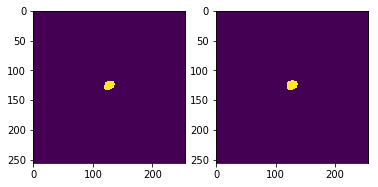

(array([126, 126, 127, 127, 127, 128, 128, 129, 129]), array([124, 125, 124, 125, 126, 125, 126, 125, 126]))
(array([126, 126, 126, 127, 127, 127, 128, 128, 129, 129]), array([124, 125, 126, 124, 125, 126, 125, 126, 125, 126]))


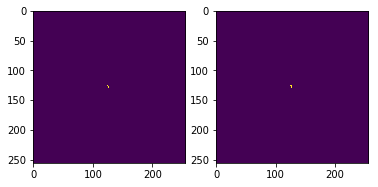

(array([119, 119, 119, 119, 119, 119, 119, 120, 120, 120, 120, 120, 120,
       120, 120, 120, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121,
       121, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122,
       123, 123, 123, 123, 123, 123, 123, 123, 123, 123, 123, 123, 123,
       124, 124, 124, 124, 124, 124, 124, 124, 124, 124, 124, 124, 124,
       125, 125, 125, 125, 125, 125, 125, 125, 125, 125, 125, 125, 125,
       125, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126,
       126, 126, 126, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127,
       127, 127, 127, 127, 127, 127, 128, 128, 128, 128, 128, 128, 128,
       128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 129, 129, 129,
       129, 129, 129, 129, 129, 129, 129, 129, 129, 129, 129, 129, 129,
       129, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130,
       130, 130, 130, 130, 130, 131, 131, 131, 131, 131, 131, 131, 131,
       131, 131, 131, 131, 131, 131, 131, 131, 131, 132, 132, 1

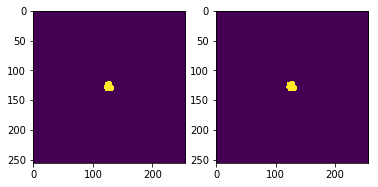

(array([131, 131, 132, 132, 132, 133, 133, 133, 133, 134, 134, 134, 135,
       135, 135, 136, 136, 136, 137]), array([131, 132, 130, 131, 132, 130, 131, 132, 133, 131, 132, 133, 131,
       132, 133, 131, 132, 133, 133]))
(array([130, 131, 131, 131, 132, 132, 132, 133, 133, 133, 133, 134, 134,
       134, 135, 135, 135, 136, 136, 136, 137]), array([131, 130, 131, 132, 130, 131, 132, 130, 131, 132, 133, 131, 132,
       133, 131, 132, 133, 131, 132, 133, 133]))


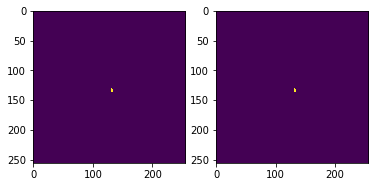

(array([131, 131, 131, 131, 132, 132, 132, 132, 132, 132, 133, 133, 133,
       133, 133, 134, 134, 134, 134, 134, 135, 135, 135, 135, 135, 136,
       136, 136, 136, 136, 137, 137, 137]), array([130, 131, 132, 133, 128, 129, 130, 131, 132, 133, 129, 130, 131,
       132, 133, 129, 130, 131, 132, 133, 129, 130, 131, 132, 133, 129,
       130, 131, 132, 133, 130, 131, 132]))
(array([130, 130, 130, 130, 131, 131, 131, 131, 131, 131, 132, 132, 132,
       132, 132, 132, 133, 133, 133, 133, 133, 134, 134, 134, 134, 134,
       135, 135, 135, 135, 135, 136, 136, 136, 136, 136, 137, 137, 137]), array([129, 130, 131, 132, 128, 129, 130, 131, 132, 133, 128, 129, 130,
       131, 132, 133, 129, 130, 131, 132, 133, 129, 130, 131, 132, 133,
       129, 130, 131, 132, 133, 129, 130, 131, 132, 133, 130, 131, 132]))


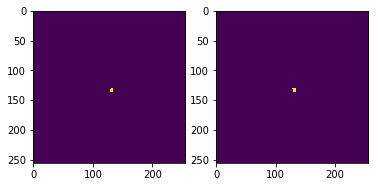

(array([131, 132, 132, 133, 133, 134, 134]), array([131, 130, 131, 130, 131, 130, 131]))
(array([131, 131, 131, 132, 132, 132, 133, 133, 134, 134]), array([129, 130, 131, 129, 130, 131, 130, 131, 130, 131]))


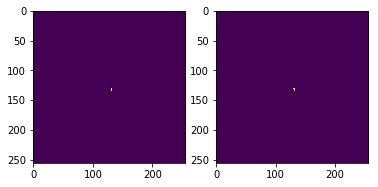

(array([120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 121,
       121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121,
       122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122,
       122, 122, 123, 123, 123, 123, 123, 123, 123, 123, 123, 123, 123,
       123, 123, 123, 123, 123, 123, 124, 124, 124, 124, 124, 124, 124,
       124, 124, 124, 124, 124, 124, 124, 124, 124, 124, 124, 125, 125,
       125, 125, 125, 125, 125, 125, 125, 125, 125, 125, 125, 125, 125,
       125, 125, 125, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126,
       126, 126, 126, 126, 126, 126, 126, 126, 126, 127, 127, 127, 127,
       127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127,
       127, 127, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128,
       128, 128, 128, 128, 128, 128, 128, 128, 129, 129, 129, 129, 129,
       129, 129, 129, 129, 129, 129, 129, 129, 129, 129, 129, 129, 129,
       130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 1

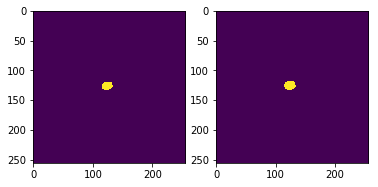

(array([126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 127, 127, 127,
       127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 128, 128, 128,
       128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 129,
       129, 129, 129, 129, 129, 129, 129, 129, 129, 129, 129, 129, 129,
       129, 129, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130,
       130, 130, 130, 130, 130, 130, 130, 131, 131, 131, 131, 131, 131,
       131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131,
       132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132,
       132, 132, 132, 132, 132, 132, 133, 133, 133, 133, 133, 133, 133,
       133, 133, 133, 133, 133, 133, 133, 133, 133, 133, 133, 133, 133,
       134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134,
       134, 134, 134, 134, 134, 134, 134, 135, 135, 135, 135, 135, 135,
       135, 135, 135, 135, 135, 135, 135, 135, 135, 135, 135, 135, 135,
       135, 136, 136, 136, 136, 136, 136, 136, 136, 136, 136, 1

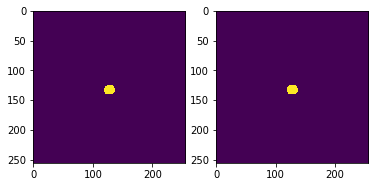

(array([118, 118, 118, 118, 118, 118, 118, 118, 119, 119, 119, 119, 119,
       119, 119, 119, 119, 119, 119, 119, 119, 119, 120, 120, 120, 120,
       120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 121,
       121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121,
       121, 121, 121, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122,
       122, 122, 122, 122, 122, 122, 122, 122, 123, 123, 123, 123, 123,
       123, 123, 123, 123, 123, 123, 123, 123, 123, 123, 123, 123, 123,
       123, 124, 124, 124, 124, 124, 124, 124, 124, 124, 124, 124, 124,
       124, 124, 124, 124, 124, 124, 124, 125, 125, 125, 125, 125, 125,
       125, 125, 125, 125, 125, 125, 125, 125, 125, 125, 125, 125, 125,
       125, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126,
       126, 126, 126, 126, 126, 126, 126, 126, 126, 127, 127, 127, 127,
       127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127,
       127, 127, 127, 128, 128, 128, 128, 128, 128, 128, 128, 1

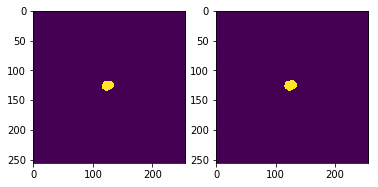

(array([118, 118, 118, 119, 119, 119, 119, 119, 119, 119, 119, 119, 120,
       120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 121, 121, 121,
       121, 121, 121, 121, 121, 121, 121, 121, 122, 122, 122, 122, 122,
       122, 122, 122, 122, 122, 122, 122, 123, 123, 123, 123, 123, 123,
       123, 123, 123, 123, 123, 123, 123, 124, 124, 124, 124, 124, 124,
       124, 124, 124, 124, 124, 124, 124, 125, 125, 125, 125, 125, 125,
       125, 125, 125, 125, 125, 125, 126, 126, 126, 126, 126, 126, 126,
       126, 126, 126, 127, 127, 127, 127, 127, 127, 127, 127, 128, 128,
       128, 128, 128]), array([122, 123, 124, 118, 119, 120, 121, 122, 123, 124, 125, 126, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 116, 117, 118,
       119, 120, 121, 122, 123, 124, 125, 126, 115, 116, 117, 118, 119,
       120, 121, 122, 123, 124, 125, 126, 114, 115, 116, 117, 118, 119,
       120, 121, 122, 123, 124, 125, 126, 114, 115, 116, 117, 118, 119,
       120, 121, 122, 123, 124, 125, 12

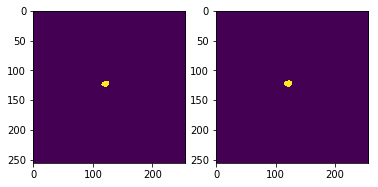

KeyboardInterrupt: 

In [10]:
for img_path, gt_path, prior_path in zip (train_list, gt_list, prior_list):
    img, gt ,prior = load_pairs(img_path,gt_path, prior_path)
    onehot_gt = class2onehot(gt)

    if(((onehot_gt[1] * (prior==1)!=(prior==1).astype(int))).sum())!=0:
        plt.figure()
        plt.subplot(121)
        plt.imshow(onehot_gt[1]*(prior==1))
        plt.subplot(122)
        plt.imshow(prior==1)
        print(np.nonzero(onehot_gt[1]*(prior==1)))
        print(np.nonzero(prior==1))
        plt.pause(2)
